In [1]:
# Import Libraries

import pandas as pd
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell # Importing so we can run multiple lines in one cell`==
InteractiveShell.ast_node_interactivity = "all" # Code so multiple lines in one cell can be ran simultaenously`==
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
import warnings
warnings.filterwarnings('ignore')

In [2]:
print("PyTorch version:", torch.__version__)
print("CUDA available? ", torch.cuda.is_available())
print(f"CUDA Device Name: {torch.cuda.get_device_name(0)}")

<IPython.core.display.Javascript object>

PyTorch version: 2.5.1


<IPython.core.display.Javascript object>

CUDA available?  True


<IPython.core.display.Javascript object>

CUDA Device Name: NVIDIA GeForce GTX 1660 Ti


# ▶  Data Import

In [3]:
df = pd.read_csv("medical_time_series .csv")   

In [4]:
df.shape

(731, 2)

In [5]:
# Checking for any null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Day      731 non-null    int64  
 1   Revenue  731 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 11.6 KB


In [6]:
df.head()

,Day,Revenue
0,1,0.000000
1,2,-0.292356
2,3,-0.327772
3,4,-0.339987
4,5,-0.124888


In [7]:
# Converting the Day column to a datetime format
df['Date'] = pd.to_datetime(df['Day'], unit='D', origin='2021-01-01')
df.set_index('Date', inplace=True) # Setting the Date column as the index

In [8]:
df.drop(columns=['Day'], inplace=True) # Dropping the Day column
df.head()

,Revenue
Date,
2021-01-02,0.000000
2021-01-03,-0.292356
2021-01-04,-0.327772
2021-01-05,-0.339987
2021-01-06,-0.124888


# ▶  Visualize the Data

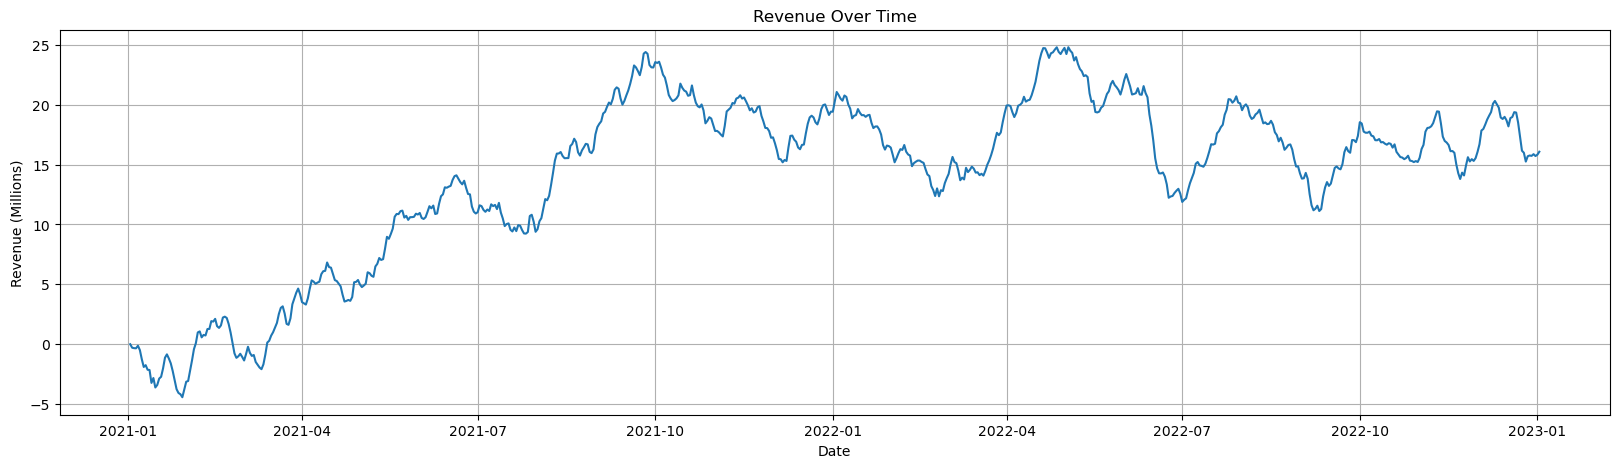

In [9]:
plt.figure(figsize=(20, 5))
plt.plot(df['Revenue'])
plt.title('Revenue Over Time')
plt.xlabel('Date')
plt.ylabel('Revenue (Millions)')
plt.grid(True)
plt.show();

# ▶  Data Cleaning

### Check for Null Values

In [10]:
df.isnull().any()

Revenue    False
dtype: bool

In [11]:
# Export cleaned dataframe to .csv
pd.DataFrame(df).to_csv("cleaned_medical_time_series.csv")

# ▶  Data Preparation

In [12]:
# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(df,train_size=0.8, test_size=0.2, shuffle=False) # Using 80% of the data for training

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

# ▶  Checking Stationarity

In [14]:
# Import the Augmented Dickey-Fuller Test from the statsmodels library
from statsmodels.tsa.stattools import adfuller

In [15]:
# Perform Dickey-Fuller test
result = adfuller(X_train['Revenue'])

In [17]:
print('ADF Statistic: %f' % result[0]) # The test statistic
print('p-value: %f' % result[1]) # The p-value
print('Critical Values:', result[4]) # The critical values

ADF Statistic: -2.059814
p-value: 0.260977
Critical Values: {'1%': np.float64(-3.441734108219804), '5%': np.float64(-2.8665621113012514), '10%': np.float64(-2.5694446417404313)}
